In [65]:
import pandas as pd
import datetime as dt

df = pd.read_csv('C:/Users/User/Desktop/Personal Projects/Linkedin/financial-performance/data/financial_performance_data.csv')
df.head()

,Transaction_ID,Transaction_Date,Revenue,Expenses,Profit,Category,Department,Manager_Name,Region
0,1,2020-04-01,23610.60,16729.05,6881.55,Sales Revenue,Finance,Jane Smith,Asia-Pacific
1,2,2019-04-13,21612.41,8717.64,12894.77,Sales Revenue,Operations,Sarah Brown,Asia-Pacific
2,3,2022-01-31,1444.42,15193.23,-13748.81,Sales Revenue,Sales,David Green,Europe
3,4,2021-09-30,13146.60,2315.81,10830.79,Marketing Expenses,Sales,Jane Smith,Asia-Pacific
4,5,2021-07-03,12589.60,6671.67,5917.93,Sales Revenue,Finance,Jane Smith,Asia-Pacific


In [66]:
df.describe()

,Transaction_ID,Revenue,Expenses,Profit
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15040.894743,10949.854127,4091.040617
std,866.169729,8546.938979,5197.792546,9972.841945
min,1.000000,5.870000,2009.650000,-19496.610000
25%,750.750000,7582.225000,6433.387500,-3088.870000
50%,1500.500000,15388.860000,10878.975000,4155.435000
75%,2250.250000,22241.655000,15413.650000,11591.322500
max,3000.000000,29998.550000,19999.180000,27623.650000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    3000 non-null   int64  
 1   Transaction_Date  3000 non-null   object 
 2   Revenue           3000 non-null   float64
 3   Expenses          3000 non-null   float64
 4   Profit            3000 non-null   float64
 5   Category          3000 non-null   object 
 6   Department        3000 non-null   object 
 7   Manager_Name      3000 non-null   object 
 8   Region            3000 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 211.1+ KB


In [68]:
# lowercase for headers
df.columns = df.columns.str.lower()

In [69]:
df.head()

,transaction_id,transaction_date,revenue,expenses,profit,category,department,manager_name,region
0,1,2020-04-01,23610.60,16729.05,6881.55,Sales Revenue,Finance,Jane Smith,Asia-Pacific
1,2,2019-04-13,21612.41,8717.64,12894.77,Sales Revenue,Operations,Sarah Brown,Asia-Pacific
2,3,2022-01-31,1444.42,15193.23,-13748.81,Sales Revenue,Sales,David Green,Europe
3,4,2021-09-30,13146.60,2315.81,10830.79,Marketing Expenses,Sales,Jane Smith,Asia-Pacific
4,5,2021-07-03,12589.60,6671.67,5917.93,Sales Revenue,Finance,Jane Smith,Asia-Pacific


In [70]:
# Correct data type for transaction_date
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    3000 non-null   int64         
 1   transaction_date  3000 non-null   datetime64[ns]
 2   revenue           3000 non-null   float64       
 3   expenses          3000 non-null   float64       
 4   profit            3000 non-null   float64       
 5   category          3000 non-null   object        
 6   department        3000 non-null   object        
 7   manager_name      3000 non-null   object        
 8   region            3000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 211.1+ KB


# Analysis

In [72]:
# What is the total revenue, expenses, and profit across all departments?
df.groupby('department')[['revenue', 'expenses', 'profit']].sum()

,revenue,expenses,profit
department,,,
Finance,11195347.50,8009017.86,3186329.64
Marketing,11371671.03,8346948.80,3024722.23
Operations,10890809.22,7983942.99,2906866.23
Sales,11664856.48,8509652.73,3155203.75


In [73]:
# What is the average revenue and profit by department?
df.groupby('department')[['revenue', 'profit']].mean()

,revenue,profit
department,,
Finance,15128.847973,4305.850865
Marketing,15002.204525,3990.398720
Operations,15084.223296,4026.130512
Sales,14954.944205,4045.133013


In [74]:
# Which department has the highest total profit?
# Find department with hightest profit
hightest_total_department = df.groupby('department')['profit'].sum().sort_values(ascending=False).idxmax()

# Get value of hightest profit
hightest_total_profit = df.groupby('department')['profit'].sum().sort_values(ascending=False).max()

# Display
print(f'The department with the hightest total profit is {hightest_total_department}: ${hightest_total_profit}')

The department with the hightest total profit is Finance: $3186329.64


In [75]:
# What is the profit margin (profit/revenue) for each transaction and department?
# Create a profit_margin column
df['profit_margin'] = df['profit'] / df['revenue']

# Display
df.head()

,transaction_id,transaction_date,revenue,expenses,profit,category,department,manager_name,region,profit_margin
0,1,2020-04-01,23610.60,16729.05,6881.55,Sales Revenue,Finance,Jane Smith,Asia-Pacific,0.291460
1,2,2019-04-13,21612.41,8717.64,12894.77,Sales Revenue,Operations,Sarah Brown,Asia-Pacific,0.596637
2,3,2022-01-31,1444.42,15193.23,-13748.81,Sales Revenue,Sales,David Green,Europe,-9.518568
3,4,2021-09-30,13146.60,2315.81,10830.79,Marketing Expenses,Sales,Jane Smith,Asia-Pacific,0.823847
4,5,2021-07-03,12589.60,6671.67,5917.93,Sales Revenue,Finance,Jane Smith,Asia-Pacific,0.470065


                      revenue    expenses      profit
transaction_month                                    
1                  3982488.99  2938422.29  1044066.70
2                  4003035.51  2869844.56  1133190.95
3                  3706371.26  2677029.00  1029342.26
4                  3951888.51  2856630.51  1095258.00
5                  3620436.74  2624477.33   995959.41
6                  4227394.69  2990028.85  1237365.84
7                  4302818.79  3066877.43  1235941.36
8                  3887013.13  2911153.92   975859.21
9                  3847305.37  2755547.99  1091757.38
10                 3410568.63  2649462.49   761106.14
11                 2806946.24  2094867.73   712078.51
12                 3376416.37  2415220.28   961196.09


<Axes: title={'center': 'Revenue, Expenses and Profit Over Time by Month'}, xlabel='transaction_month'>

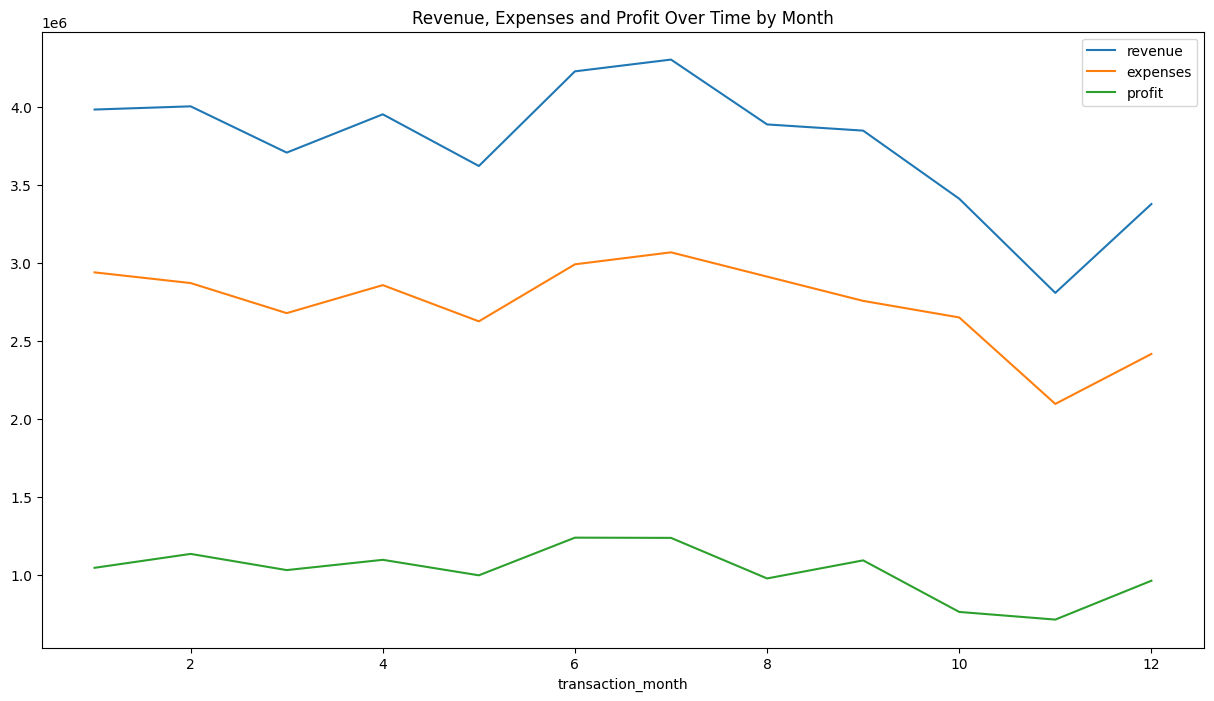

In [104]:
# How has revenue, expenses, and profit trended over time (by month or quarter)?
df['transaction_month'] = df['transaction_date'].dt.month

# Get trends for revenue, expenses and profit
transaction_trend = df.groupby('transaction_month')[['revenue', 'expenses', 'profit']].sum()
print(transaction_trend)

# Graph data
transaction_trend.plot.line(
    figsize=(15, 8),
    title='Revenue, Expenses and Profit Over Time by Month'
)

In [121]:
# Which region generates the most revenue and profit?
# df.groupby('region')[['revenue', 'profit']].sum().sort_values(ascending=False, by=['revenue', 'profit'])


ValueError: No axis named 2 for object type DataFrame